# Logistic Regression in Machine Learning

## Introduction
Logistic regression is a statistical method used for binary classification problems. It predicts the probability of a categorical dependent variable based on one or more predictor variables. It is widely used for tasks like spam detection, medical diagnoses, and customer churn prediction.

In this notebook, we'll:
1. Load and explore a dataset.
2. Preprocess the data.
3. Visualize the data.
4. Build and train a polynomial regression model.
5. Evaluate the model.
6. Visualize the model's predictions.
7. 
   ctions.

## Libraries
We'll start by importing the necessary libraries for this analysis.

In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load dataset
For this example we will use 'iris' dataset from 'sklearn.datasets'. It is a binary classified dataset (there are only 2 groups/classes in this datasets)

In [282]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

# Display the first few rows of the dataset
X.head(), y.head()


(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Species, dtype: int32)

In [284]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

## Data Visualization
Let's visualize the data to understand its distribution and relationships.

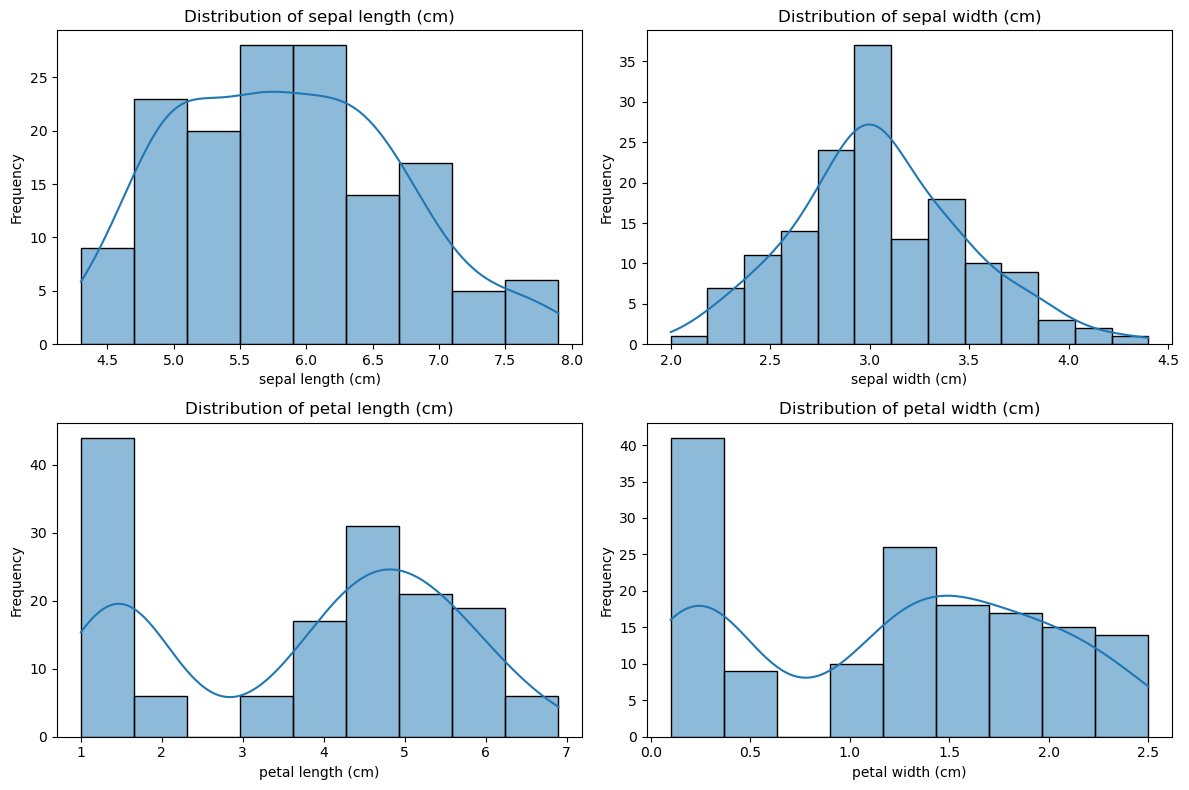

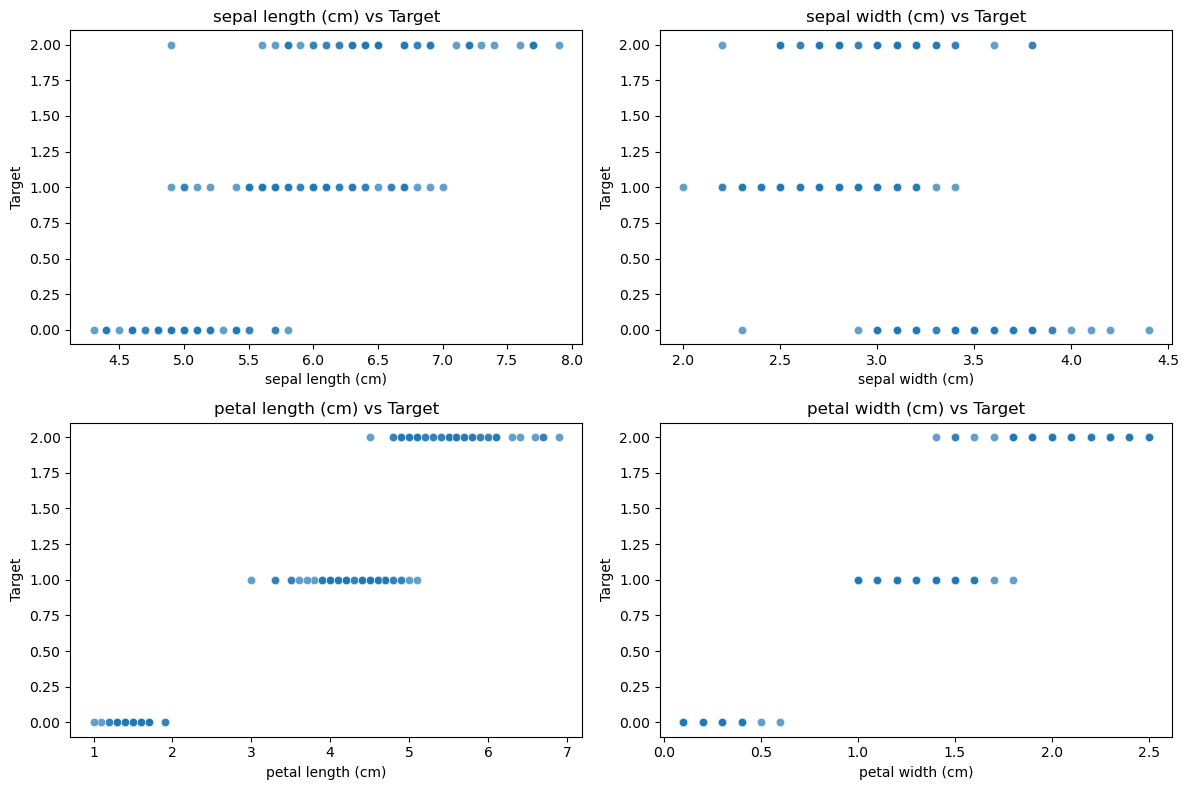

In [287]:
# Visualize the distribution of each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize the relationships between features and the binary target
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=X[feature], y=y, alpha=0.7)
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
plt.tight_layout()
plt.show()


## Data Preprocessing
We will split the dataset into training and test sets for model training and evaluation.

In [337]:
# Select only two features for simplicity
X_two_features = X[['sepal length (cm)', 'sepal width (cm)']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_two_features, y, test_size=0.2, random_state=42)


## Building and Training the Logistic Regression Model
We will build and train a logistic regression model.

In [345]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


## Model Evaluation
We will evaluate the model using accuracy, confusion matrix, and classification report.

In [350]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:', conf_matrix)
print('Score:', score)
print('Classification Report:', class_report)


Accuracy: 0.93
Confusion Matrix: [[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]
Score: 0.3
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



## Visualization of Model Predictions
Visualize the logistic regression decision boundary and predictions.

C:\Users\M Ans\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


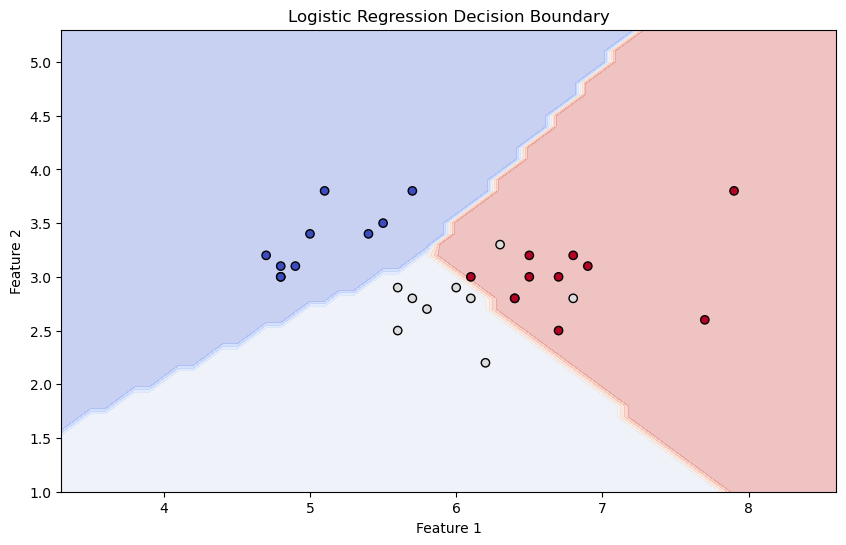

In [353]:
# Convert to binary classification (e.g., classifying as class 0 or not)
y_binary = (y == 0).astype(int)

# Select only two features for simplicity
X_two_features = X[['sepal length (cm)', 'sepal width (cm)']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_two_features, y, test_size=0.2, random_state=42)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolor='k', marker='o', cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
